In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')

In [8]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [9]:
def extract_gender(x):
    if x.lower().startswith("men's"):
        return "Men's"
    elif x.lower().startswith("women's"):
        return "Women's"
    else:
        return "Unisex"
df['Gender'] = df['Product Name'].apply(extract_gender)

df['Type'] = df['Product Name'].apply(lambda x: x.lower().split()[-1])

In [10]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender,Type
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,Women's,shoes
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,Women's,shoes
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,Women's,slippers
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,Women's,shoes
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,Women's,shoes
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1,Unisex,retro
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0,Unisex,ic
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1,Unisex,tf
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4,Unisex,98


In [11]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
Gender            object
Type              object
dtype: object

In [12]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.0,4725.0,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.0,4293.0,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,27.0,23.0,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.0,1.0,0.0,3.0,4.0,4.0,5.0
Reviews,3268.0,41.0,32.0,0.0,10.0,37.0,68.0,223.0


In [13]:
df.isnull().values.any()

False

In [14]:
# To count unique values for each column
unique_counts_per_column = df.nunique(axis=0)

In [15]:
unique_counts_per_column 

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Rating             32
Reviews           102
Gender              3
Type              200
dtype: int64

All columns in DataFrame: ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount', 'Brand', 'Rating', 'Reviews', 'Gender', 'Type']


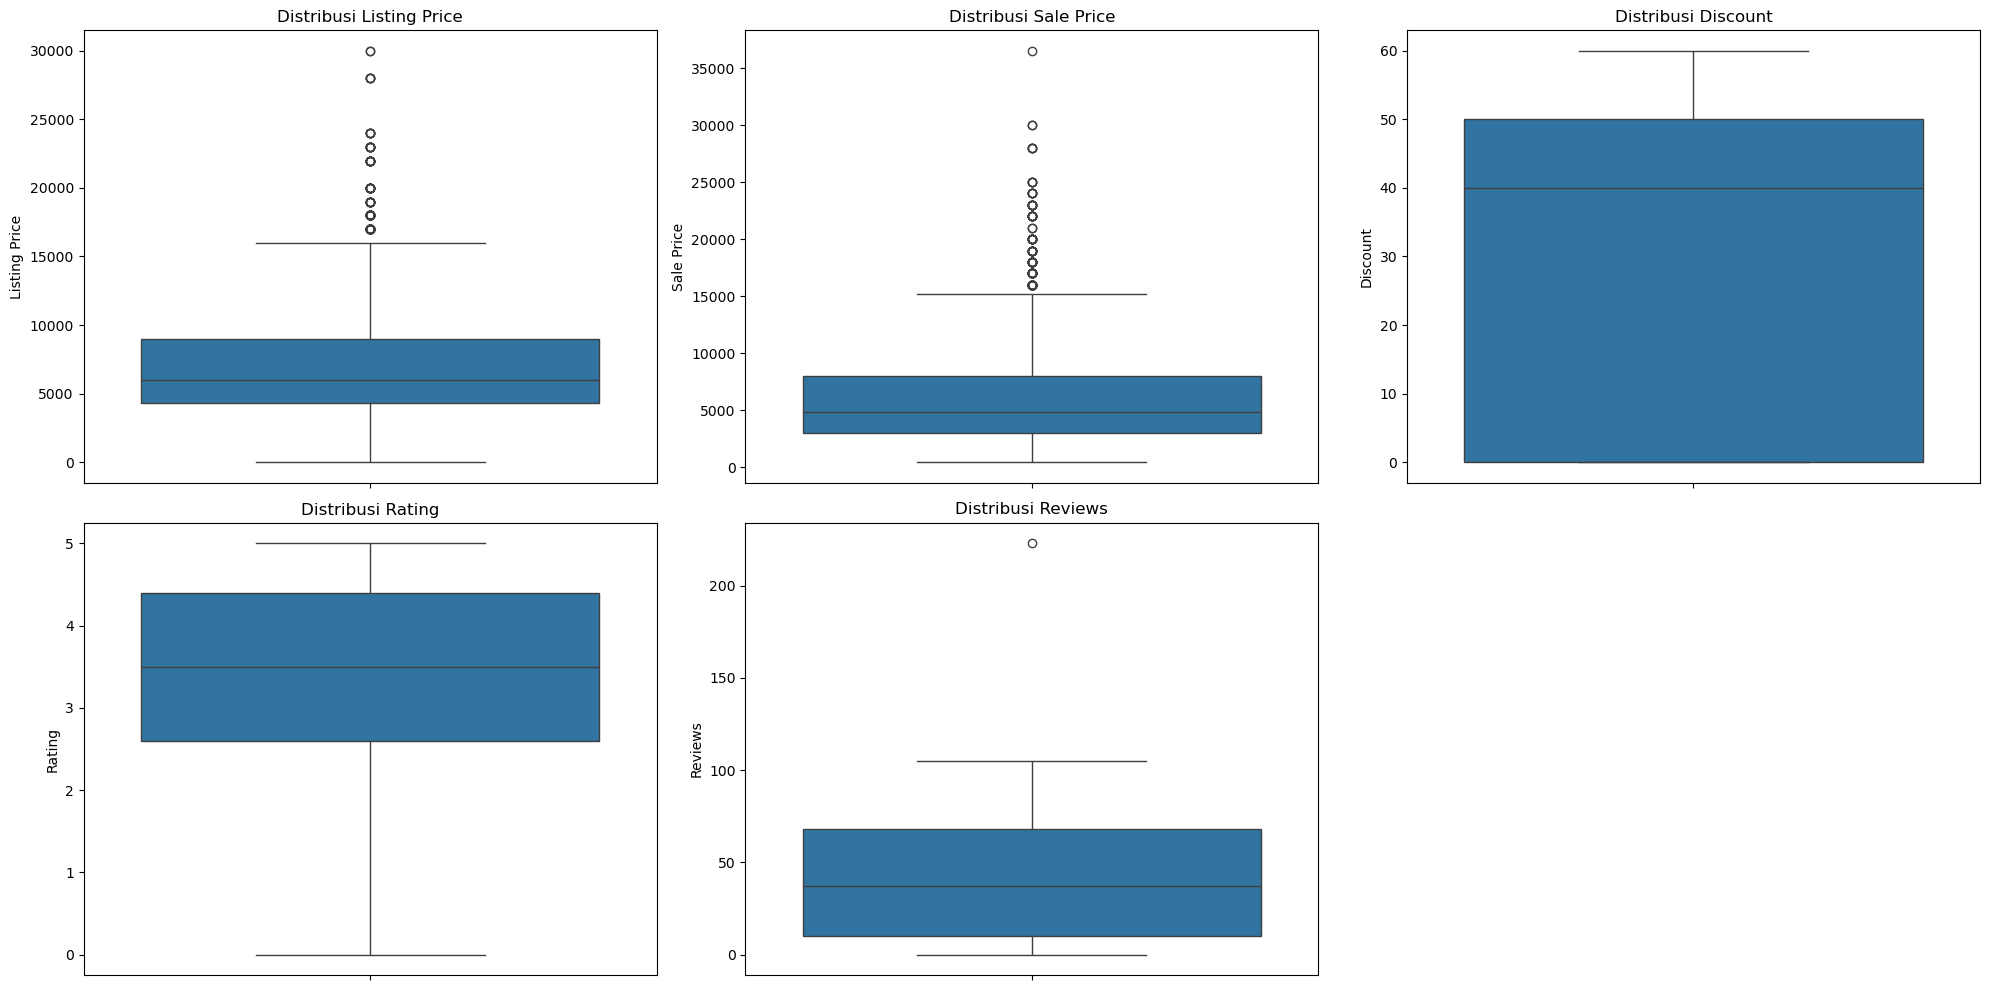

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify the columns in the DataFrame
print("All columns in DataFrame:", df.columns.tolist())

# List of columns you want to drop
columns_to_drop = ['Product Name', 'Product ID', 'Brand']

# Select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Ensure you only drop columns that are both in the DataFrame and of numeric type
existing_columns_to_drop = [col for col in columns_to_drop if col in numerical_cols]

# Drop the existing columns to get the final list of numerical columns
numerical_cols = numerical_cols.drop(existing_columns_to_drop)

# Calculate subplots configuration
num_cols = len(numerical_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# Initialize subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Create a boxplot for each valid numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {col}', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=10)

# Remove any unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

All columns in DataFrame: ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount', 'Brand', 'Rating', 'Reviews', 'Gender', 'Type']


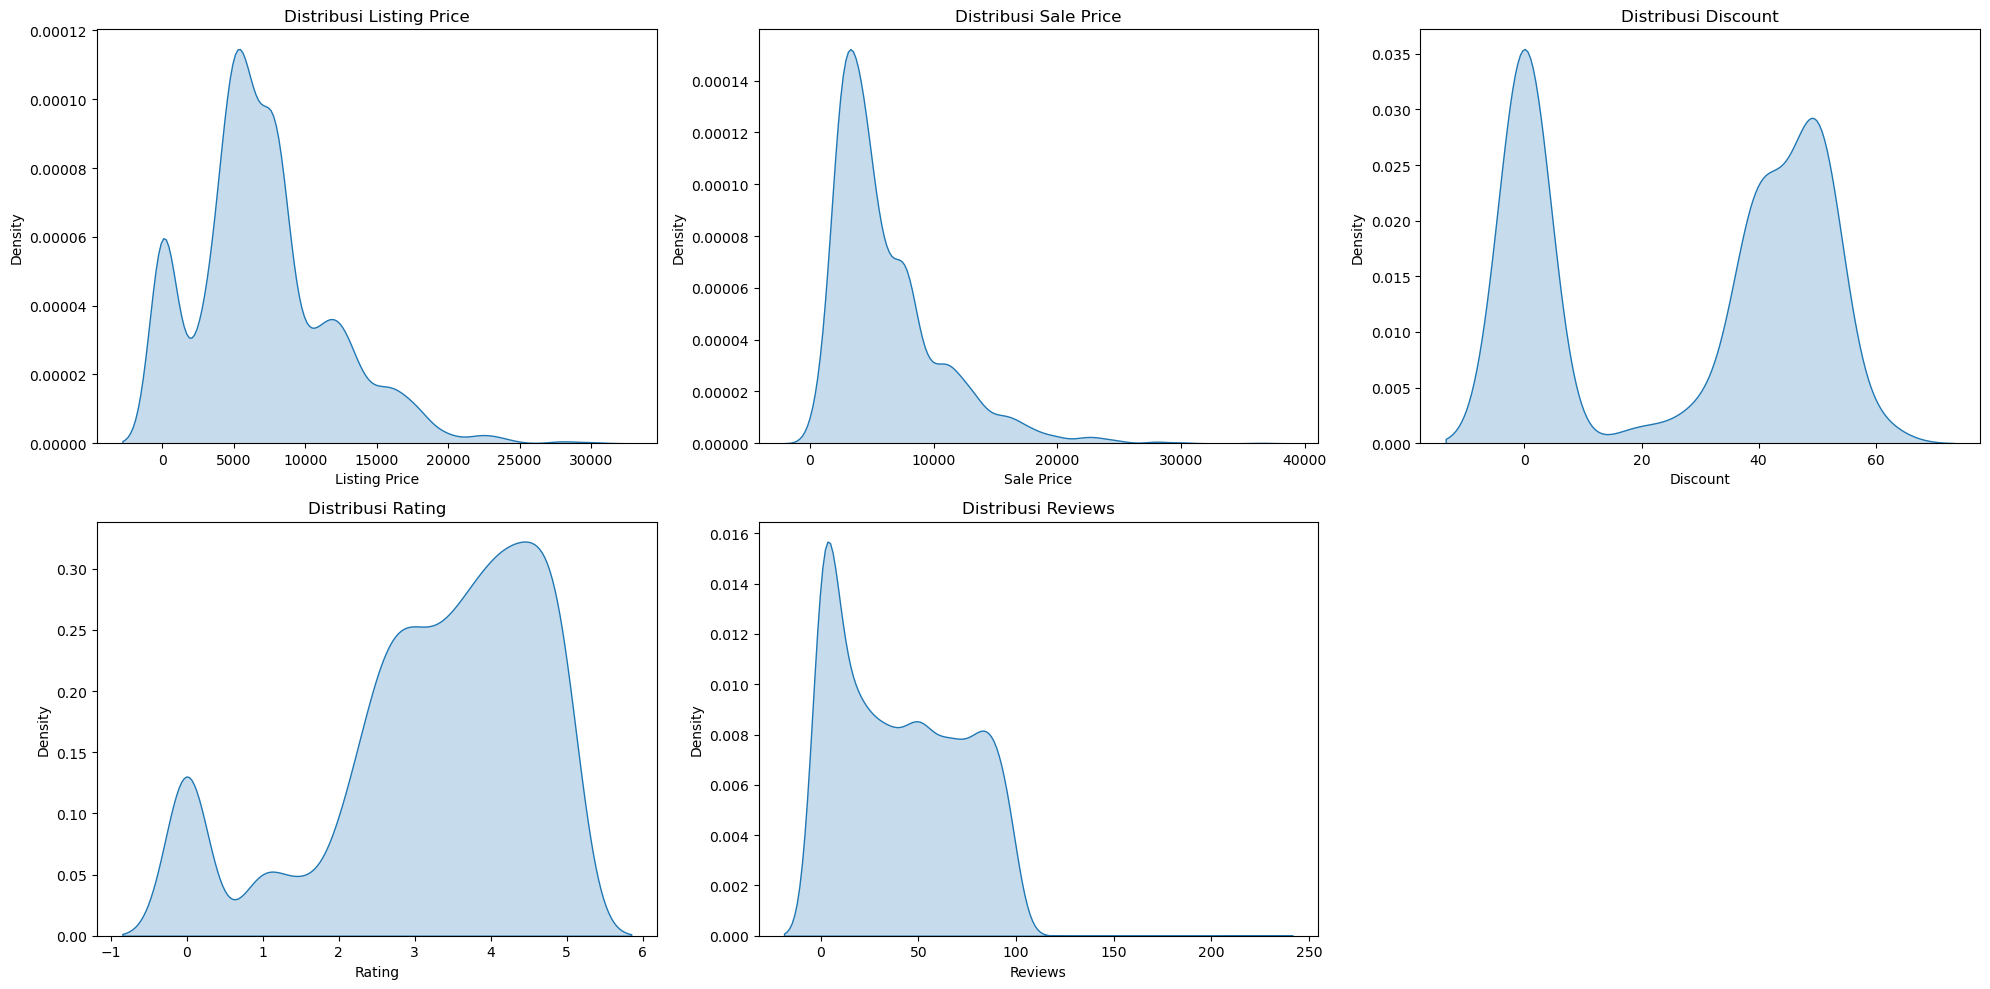

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify the columns in the DataFrame
print("All columns in DataFrame:", df.columns.tolist())

# List of columns you want to drop
columns_to_drop = ['Product Name', 'Product ID', 'Brand']

# Select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate subplots configuration
num_cols = len(numerical_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# Initialize subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Create a KDE plot for each valid numerical column
for idx, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[idx], fill=True)
    axes[idx].set_title(f'Distribusi {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)

# Remove any unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

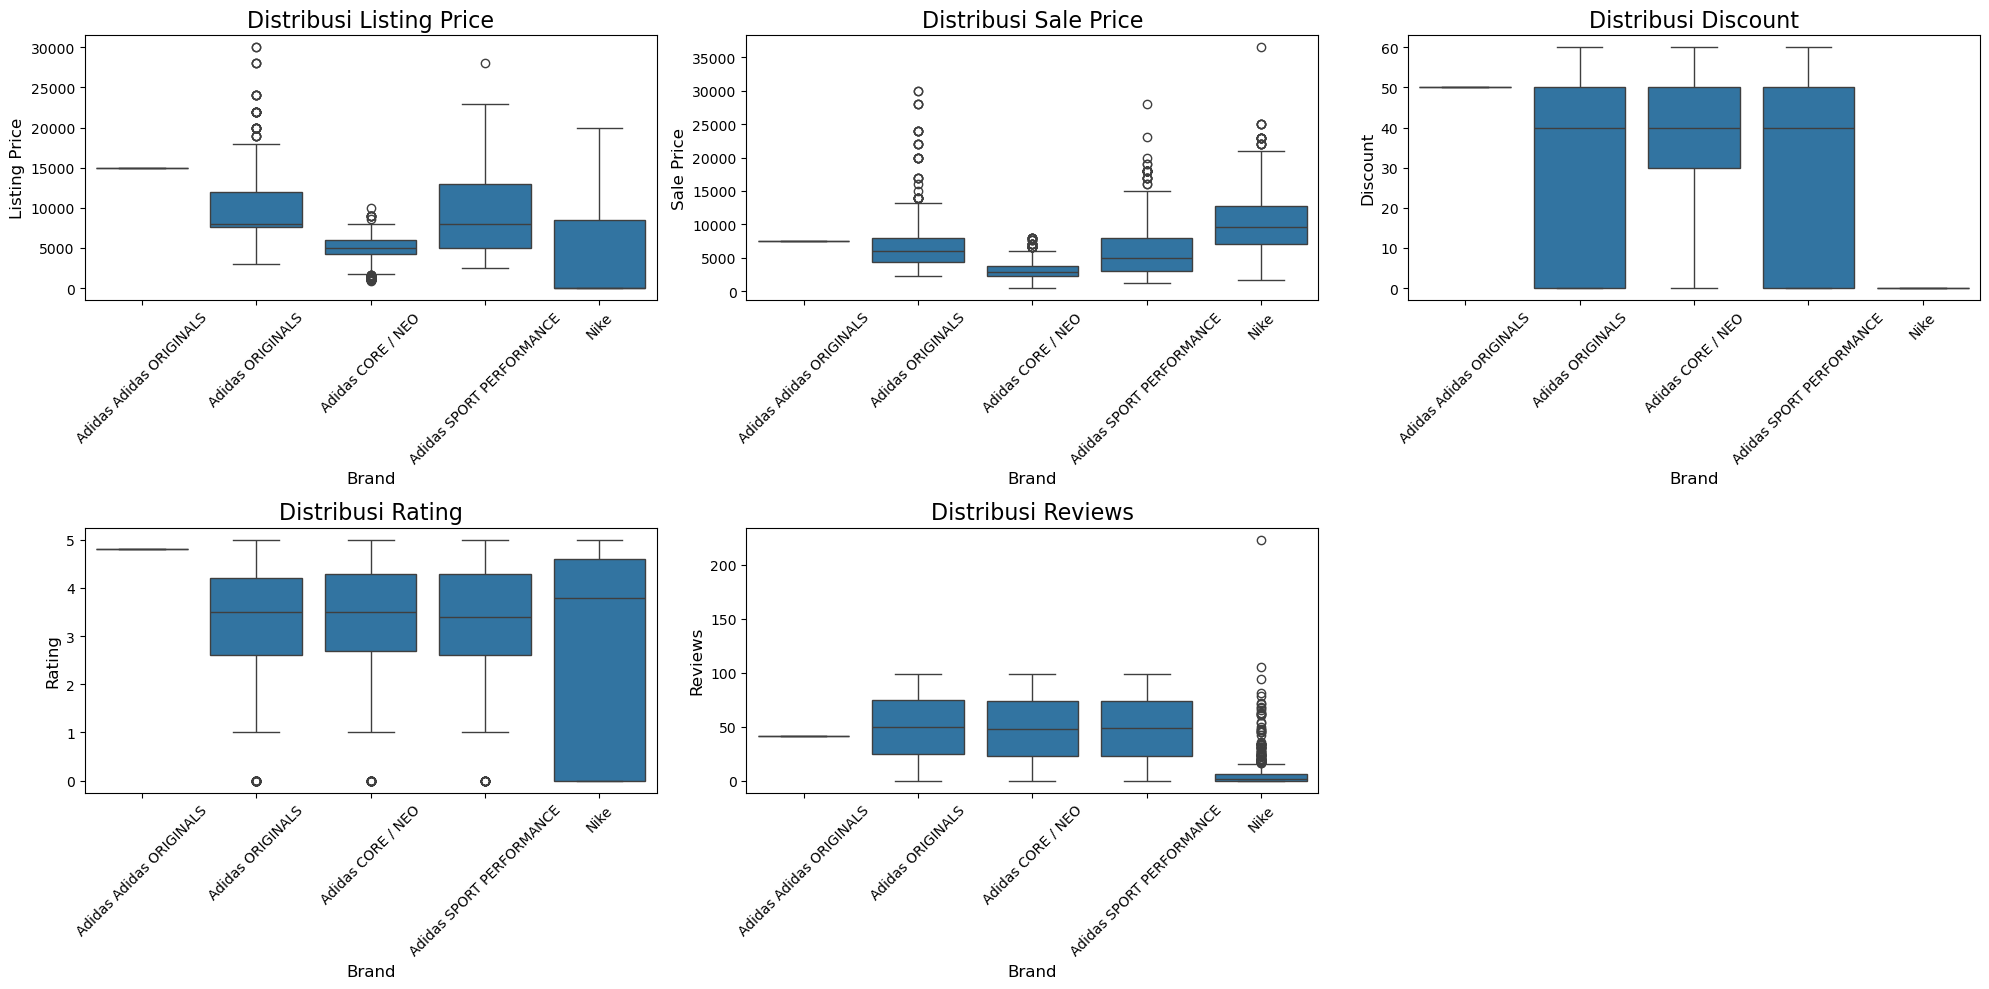

In [18]:
# Identify the top 5 brands based on their occurrence
top_brands = df['Brand'].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame to include only top 5 brands
df_top_brands = df[df['Brand'].isin(top_brands)]

# Select all integer and float columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Create a box plot for each numeric column
for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df_top_brands, x='Brand', y=col, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {col}', fontsize=16)
    axes[idx].set_xlabel('Brand', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.show()

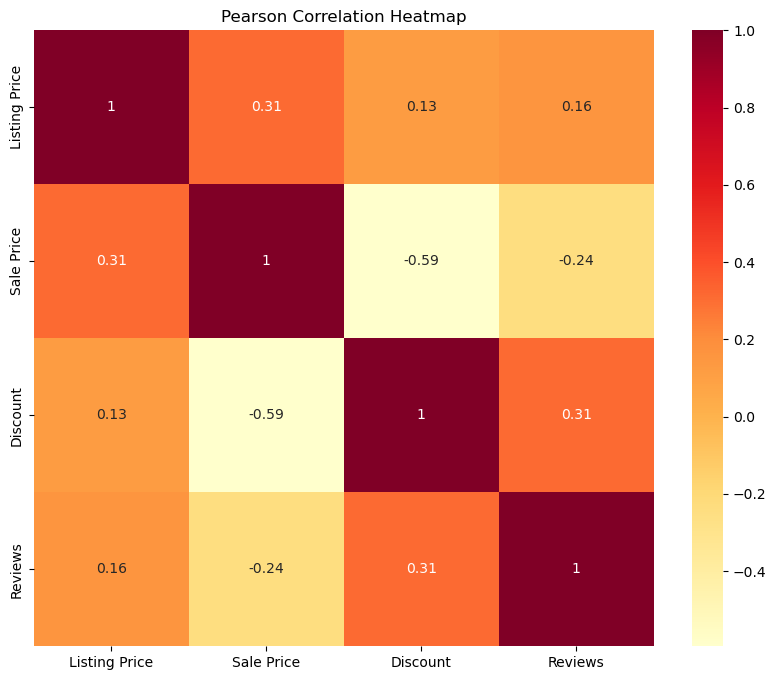

In [19]:
# Get the integer columns
int_cols = [col for col in df.columns if df[col].dtype == 'int64']

# Calculate Pearson correlation matrix
corr_matrix = df[int_cols].corr(method='pearson')

# Create a heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [20]:
df.isnull().values.any()

False

In [21]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

for col in ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']:
    df = remove_outliers_iqr(df, col)

In [22]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender,Type
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,Women's,shoes
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,Women's,shoes
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,Women's,slippers
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,Women's,shoes
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,Women's,shoes
...,...,...,...,...,...,...,...,...,...,...
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1,Unisex,amp
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1,Unisex,retro
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0,Unisex,ic
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1,Unisex,tf


In [23]:
df.isnull().values.any()

False

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df['Brand'] = df['Brand'].astype(str)

# Perform OneHotEncoding on 'Brand'
brand_encoder = OneHotEncoder(drop='first', sparse_output=False)
brand_encoded = brand_encoder.fit_transform(df[['Brand']])
brand_columns = brand_encoder.get_feature_names_out(['Brand'])
df_encoded = pd.DataFrame(brand_encoded, columns=brand_columns, index=df.index)

# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 0 to 3267
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product Name                    3017 non-null   object 
 1   Product ID                      3017 non-null   object 
 2   Listing Price                   3017 non-null   int64  
 3   Sale Price                      3017 non-null   int64  
 4   Discount                        3017 non-null   int64  
 5   Brand                           3017 non-null   object 
 6   Rating                          3017 non-null   float64
 7   Reviews                         3017 non-null   int64  
 8   Gender                          3017 non-null   object 
 9   Type                            3017 non-null   object 
 10  Brand_Adidas CORE / NEO         3017 non-null   float64
 11  Brand_Adidas ORIGINALS          3017 non-null   float64
 12  Brand_Adidas SPORT PERFORMANCE  30

In [26]:
df.isnull().values.any()

False

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples

# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Prepare the data by dropping non-numeric or unnecessary columns
X = df.drop(['Product ID', 'Product Name', 'Brand'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert to pandas DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# Elbow method to find the optimal number of clusters
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss[i] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel("Number of Clusters 'k'")
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method')
plt.show()

# Define the number of clusters from the elbow method
n_clusters = 4  # Adjust based on your observation from the elbow plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Add clusters to the data
df['Cluster'] = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add principal components to DataFrame
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Silhouette plot
fig, ax = plt.subplots(figsize=(10, 8))
silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

ValueError: could not convert string to float: "Women's"

In [ ]:
# Inspect clusters' average for each feature
cluster_profiles = df.groupby('Cluster').agg({
    'Listing Price': 'mean',
    'Sale Price': 'mean',
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
})

# Visualize price-related features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Listing Price', data=df, palette='viridis')
plt.title('Listing Price Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Sale Price', data=df, palette='viridis')
plt.title('Sale Price Distribution by Cluster')
plt.show()

# Visualize Discounts and Ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Discount', data=df, palette='viridis')
plt.title('Discount Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Cluster')
plt.show()

# Visualize Reviews
plt.figure(figsize=(7, 6))
sns.boxplot(x='Cluster', y='Reviews', data=df, palette='viridis')
plt.title('Reviews Distribution by Cluster')
plt.show()

In [ ]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df.groupby('Cluster').agg({
    'Listing Price': ['mean', 'median', 'std', 'count'],
    'Sale Price': ['mean', 'median', 'std', 'count'],
    'Discount': ['mean', 'median', 'std', 'count'],
    'Rating': ['mean', 'median', 'std', 'count'],
    'Reviews': ['mean', 'median', 'std', 'count']
})

descriptive_stats.T.round(2)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to consider for correlation analysis
features_for_correlation = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Create a correlation heatmap for each KMeans cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster][features_for_correlation]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for KMeans Cluster {cluster}')
    plt.show()